In [1]:
import sys
sys.path.append('..')
from src.pomdp import *

In [2]:
model, solver, init_belief = load_from_file(file_name='./Example Models/tiger.95.POMDP')

In [4]:
vf, history = solver.solve(model,8,8,init_belief)

<Figure size 700x500 with 0 Axes>

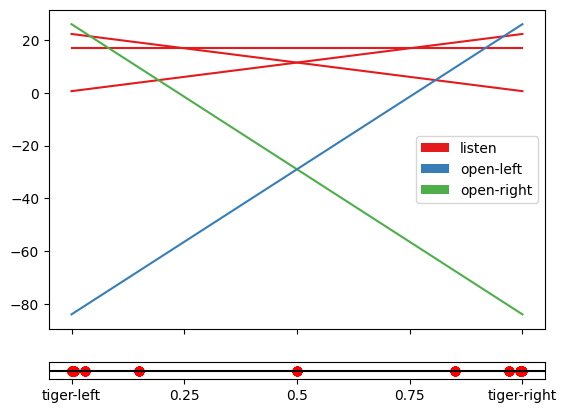

In [6]:
history.plot_solution()